# Factors Contributing to the Success of a Movie Analysis
*Is the movie industry dying? What determines the success of a movie?*



# Goal
*The goal of this project is to identify the factors that contribute to the success of a movie, specifically whether the production company, the movie's budget, or other variables play a significant role in determining a movie's success. By performing a data analysis using Python, this project aims to provide valuable insights that can help movie production companies make more informed decisions about which movies to produce, which companies to partner with, and how to allocate resources to maximize the chances of success.*

# Setup

Importing the necessary libraries I will use for this project

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [94]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies (2).csv


Reading in the data


In [95]:
df = pd.read_csv("movies (2).csv")

Looking at the data


In [96]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980.0,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980.0,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020.0,2020-10-23,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020.0,2020-02-07,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020.0,2020-04-27,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020.0,2020-10-01,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [98]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980.0,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980.0,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data Cleaning!

Checking for missing data


In [99]:
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 3%
company - 0%
runtime - 0%


Removing null values from the data


In [102]:
df = df.dropna()

Dropping duplicates


In [103]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980.0,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980.0,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020.0,2020-01-17,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020.0,2020-02-14,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020.0,2020-01-17,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020.0,2020-02-21,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


Checking the data type of the columns


In [104]:
print(df.dtypes)

name         object
rating       object
genre        object
year        float64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


Changing the data type of columns


In [105]:
# Some of the year columns and released have different years, we will splice the released date and use that year.

df['correctyear'] = df['released'].astype(str).str[:4]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980.0,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980.0,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980.0,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980.0,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020.0,2020-01-17,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020.0,2020-02-14,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020.0,2020-01-17,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020.0,2020-02-21,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020


Adding a Month column


In [106]:
df['correctmonth'] = df['released'].astype(str).str[5:7]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,correctmonth
0,The Shining,R,Drama,1980.0,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,06
1,The Blue Lagoon,R,Adventure,1980.0,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,07
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,06
3,Airplane!,PG,Comedy,1980.0,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,07
4,Caddyshack,R,Comedy,1980.0,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020.0,2020-01-17,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020,01
7649,Sonic the Hedgehog,PG,Action,2020.0,2020-02-14,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020,02
7650,Dolittle,PG,Adventure,2020.0,2020-01-17,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020,01
7651,The Call of the Wild,PG,Adventure,2020.0,2020-02-21,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020,02


Ordering the Data


In [107]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,correctmonth
5445,Avatar,PG-13,Action,2009.0,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009,12
7445,Avengers: Endgame,PG-13,Action,2019.0,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019,04
3045,Titanic,PG-13,Drama,1997.0,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997,12
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015.0,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015,12
7244,Avengers: Infinity War,PG-13,Action,2018.0,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009.0,2015-01-15,5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,2015,01
2434,Philadelphia Experiment II,PG-13,Action,1993.0,1994-06-04,4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0,1994,06
3681,Ginger Snaps,Not Rated,Drama,2000.0,2001-05-11,6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,2001,05
272,Parasite,R,Horror,1982.0,1982-03-12,3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,1982,03


Checking for Outliers


<Axes: >

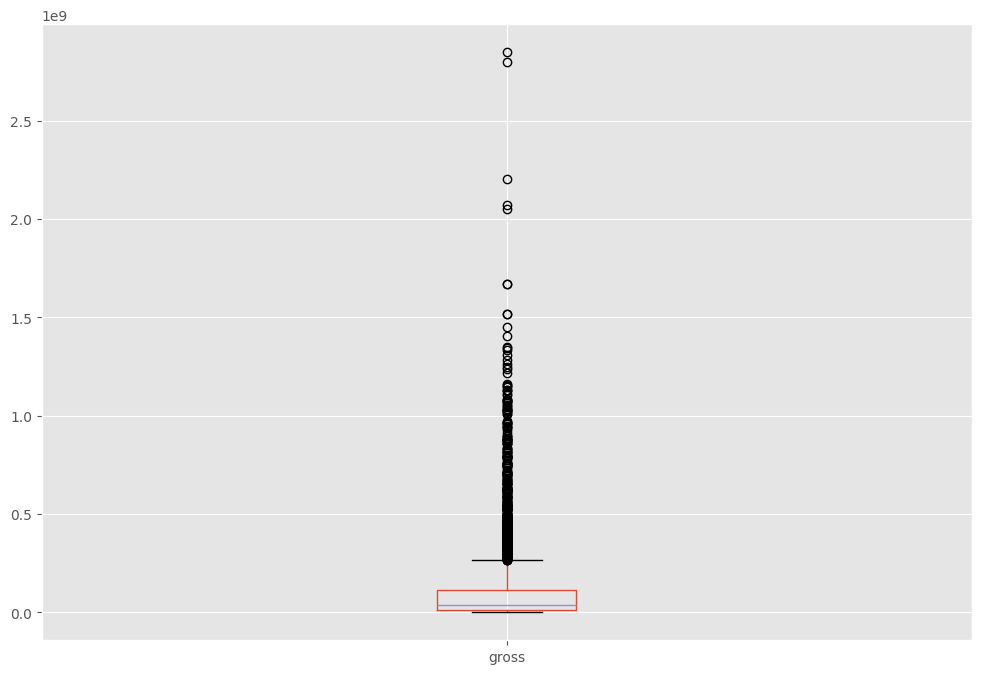

In [108]:
df.boxplot(column=['gross'])

Removing Outliers


In [109]:
z_scores = stats.zscore(df['gross'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

<Axes: >

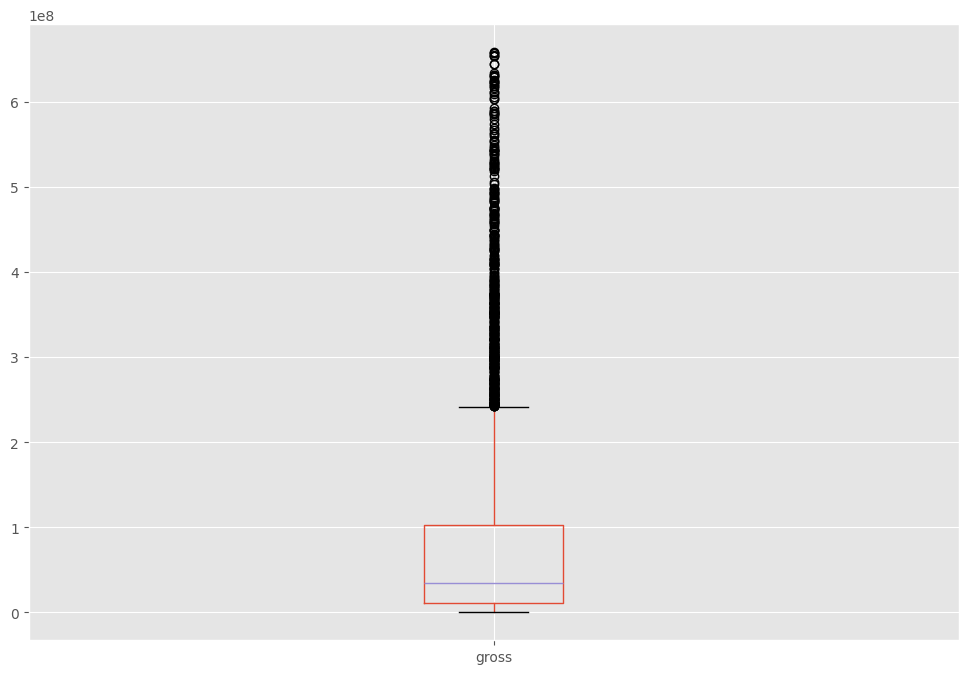

In [110]:
df.boxplot(column=['gross'])

# Data Exploration!

In my analysis, I explored and answered the correlation of a movie's success to key factors in its creation such as budget, company, genre, etc..

Text(0.5, 1.0, 'Gross Earnings vs Budget')

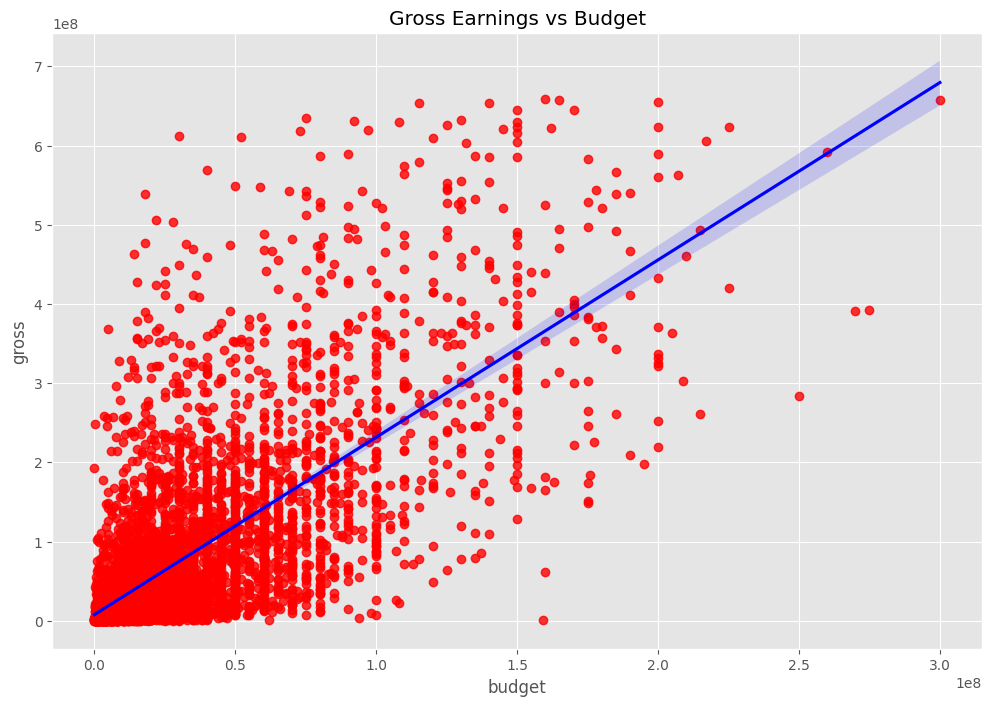

In [111]:
# Looking at correlation

sns.regplot(x="budget", y="gross", data=df, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('Gross Earnings vs Budget')

From this graph, we can determine that there is a significant relationship between the budget and gross earnings of a movie.



# Correlation Matrix


Let's take a deeper look at the relationship of all the other variables to see what correlates the most to gross earnings.

**Let's Update all the columns to numeric values**

By doing this, we can show the correlation between all the variables and not only the ones with numerical values. This will help us to understand which variables are strongly or weakly correlated with each other.

In [112]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,correctmonth
0,4582,6,6,1980.0,8,8.4,927000.0,1786,2817,690,46,19000000.0,46998772.0,1415,146.0,0,5
1,3837,6,1,1980.0,12,5.8,65000.0,1570,1150,211,47,4500000.0,58853106.0,446,104.0,0,6
2,3554,4,0,1980.0,9,8.7,1200000.0,753,1806,1146,47,18000000.0,538375067.0,935,124.0,0,5
3,203,4,4,1980.0,12,7.7,221000.0,884,1402,1461,47,3500000.0,83453539.0,1097,88.0,0,6
4,722,6,4,1980.0,14,7.3,108000.0,715,349,268,47,6000000.0,39846344.0,1072,98.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,408,6,0,2020.0,2329,6.6,140000.0,16,2375,1798,47,90000000.0,426505244.0,446,124.0,40,0
7649,3478,4,0,2020.0,2331,6.5,102000.0,847,2294,145,47,85000000.0,319715683.0,1097,99.0,40,1
7650,1132,4,1,2020.0,2329,5.6,53000.0,1800,2812,1457,47,175000000.0,245487753.0,1386,101.0,40,0
7651,3886,4,1,2020.0,2332,6.8,42000.0,294,2076,632,6,135000000.0,111105497.0,12,100.0,40,1


Looking at the highest correlation


In [113]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

# Sorting the correlation pairs
sorted_pairs = corr_pairs.sort_values()

# Including only pairs that have a correlation greater than 0.5.
# A correlation coefficient of .50 or larger represents a strong or large correlation.
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

,,0
gross,votes,0.579244
votes,gross,0.579244
budget,gross,0.700363
gross,budget,0.700363
released,year,0.998061
year,released,0.998061
correctyear,released,0.998783
released,correctyear,0.998783
year,correctyear,0.998929
correctyear,year,0.998929


Visualizing the data


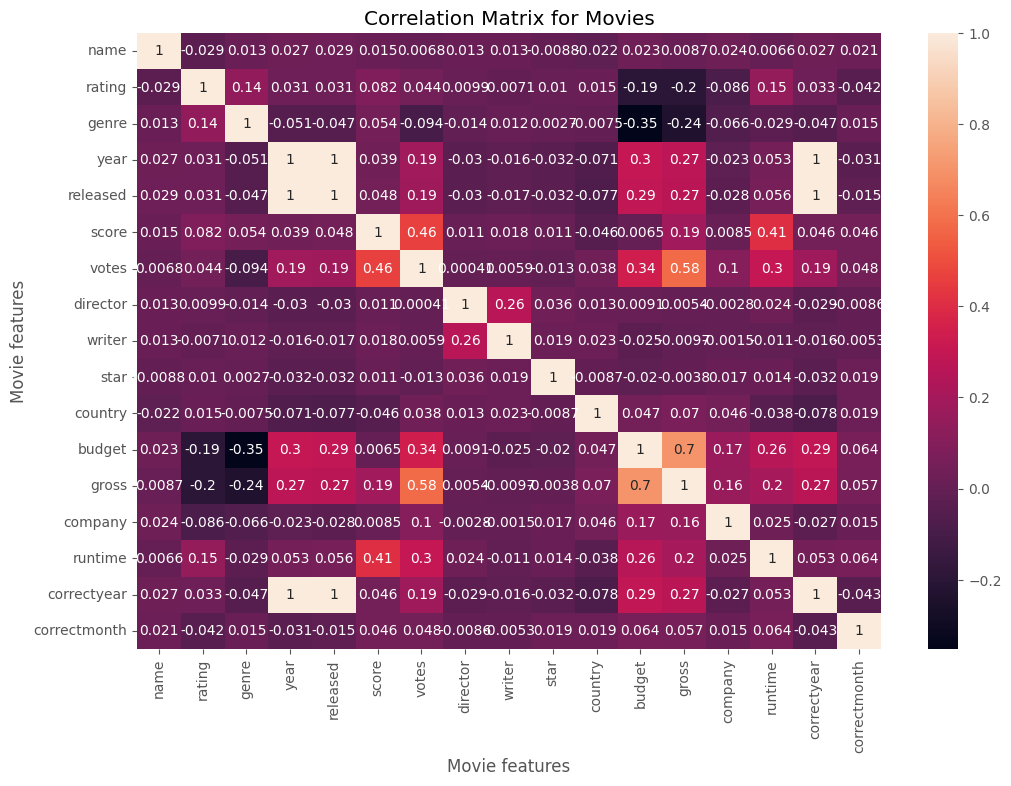

In [114]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

Conclusion: The factors contributing to the success of a movie are votes and budget as they have the highest correlation. It was also determined that the Company, Movie name, Genre had no correlation.

# Data Exploration Cont'd

While we have determined the factors contributing the most to a movie's success. There are still a few other factors we can explore.

*   What is the best time of year to release a movie?
*   What is the ideal runtime for a movie?
*   What genre of movie had the most success on average?
*   What genre of movie has the most success overall?


**What is the best time of year to release a movie?**

*By grouping the Gross Earnings by Month, we can answer this question.*

**Tabulating the data**

In [115]:
df.groupby(['correctmonth']).mean()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
correctmonth,,,,,,,,,,,,,,,,
0,2443.939189,5.407658,3.569820,2003.536036,1333.389640,6.444369,95197.072072,1108.371622,1653.745495,894.578829,42.056306,2.622468e+07,6.333553e+07,849.432432,109.599099,24.119369
1,2564.202410,5.265060,3.472289,2001.532530,1199.761446,6.366747,88642.024096,1054.245783,1642.908434,825.590361,42.207229,2.895267e+07,6.779244e+07,894.077108,107.012048,21.821687
2,2676.581448,5.253394,3.328054,2001.011312,1164.859729,6.314706,93811.846154,1034.986425,1642.733032,979.511312,44.488688,3.255790e+07,7.399234e+07,895.873303,105.823529,21.174208
3,2527.435096,5.305288,3.622596,2001.901442,1227.079327,6.232212,71754.634615,1018.456731,1593.165865,933.562500,43.281250,2.425548e+07,5.114678e+07,887.175481,104.588942,22.127404
4,2546.112948,5.206612,3.057851,2000.449036,1140.603306,6.332507,124250.093664,1067.134986,1610.975207,931.771350,43.680441,4.121545e+07,1.147295e+08,915.909091,107.721763,20.608815
5,2736.881773,4.995074,2.812808,2000.591133,1157.105911,6.406897,139995.256158,1079.613300,1601.763547,911.844828,44.081281,4.417100e+07,1.253148e+08,947.243842,108.418719,20.706897
6,2638.455189,5.073113,2.759434,2000.625000,1158.483491,6.277594,118646.698113,1067.200472,1597.179245,900.603774,44.641509,3.996013e+07,1.107495e+08,949.469340,105.365566,20.709906
7,2686.315068,5.246575,3.244618,2001.776908,1233.093933,6.182975,79332.853229,1065.577299,1593.436399,928.201566,44.080235,2.730369e+07,6.211916e+07,888.203523,103.616438,21.843444
8,2544.013761,5.440367,3.699541,2002.071101,1255.555046,6.374083,81109.405963,1038.759174,1650.759174,920.036697,42.454128,2.511282e+07,5.241661e+07,844.761468,106.472477,22.139908


**Visualizing the data**


range(0, 12)


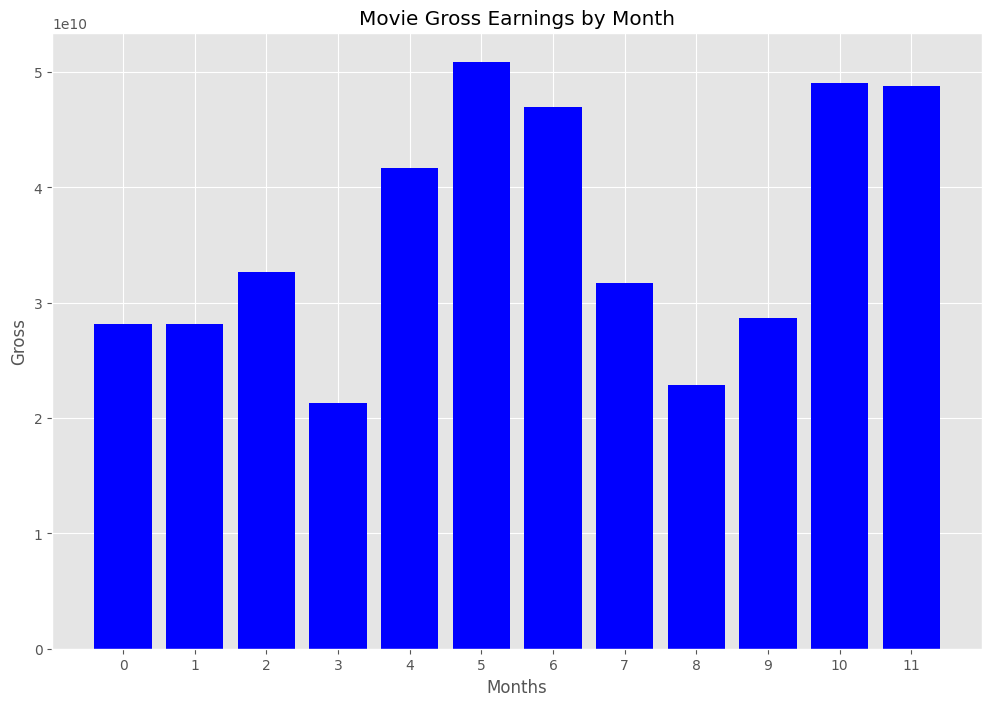

In [117]:
months = range(0,12)
print(months)

plt.bar(months,df.groupby(['correctmonth']).sum()['gross'], color=('blue'))
plt.xticks(months)
plt.title('Movie Gross Earnings by Month')
plt.ylabel('Gross')
plt.xlabel('Months')
plt.show()

Conclusion: The best months of year to release a movie are May, November, December and June based on their overall gross earnings in this period.

**What is the ideal runtime for a movie?**



**Tabulating the data**

In [118]:
gross_earnings_avg = df.groupby(['runtime'])['gross'].mean()
gross_earnings_avg.sort_values()

,gross
runtime,
209.0,968853.0
242.0,4770222.0
229.0,5473212.0
71.0,6582052.0
171.0,8064706.5
...,...
151.0,422587580.5
181.0,424208848.0
183.0,449220945.0


**Visualizing the data**


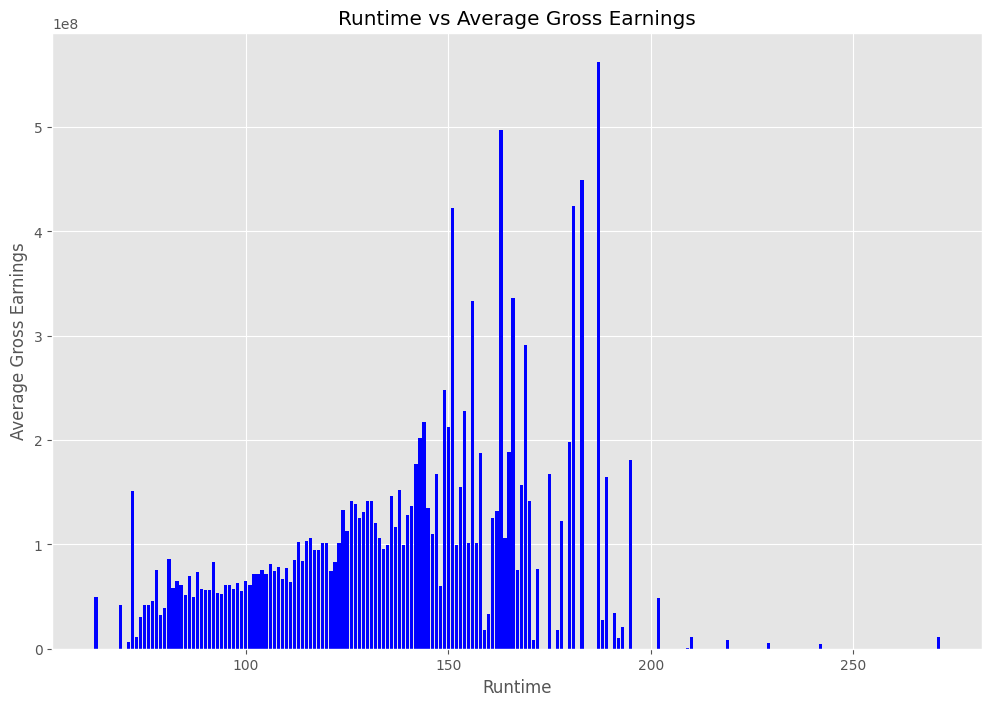

In [119]:
gross_earnings_avg = df.groupby(['runtime'])['gross'].mean()

plt.bar(gross_earnings_avg.index, gross_earnings_avg, color="blue")

plt.xlabel('Runtime')
plt.ylabel('Average Gross Earnings')
plt.title('Runtime vs Average Gross Earnings')

plt.show()

Conclusion: The ideal runtime seems to be between 160 to 190 minutes.

**What genre of movie has the most success overall? What genre of movie had the most success on average?**

**Visualizing the data**

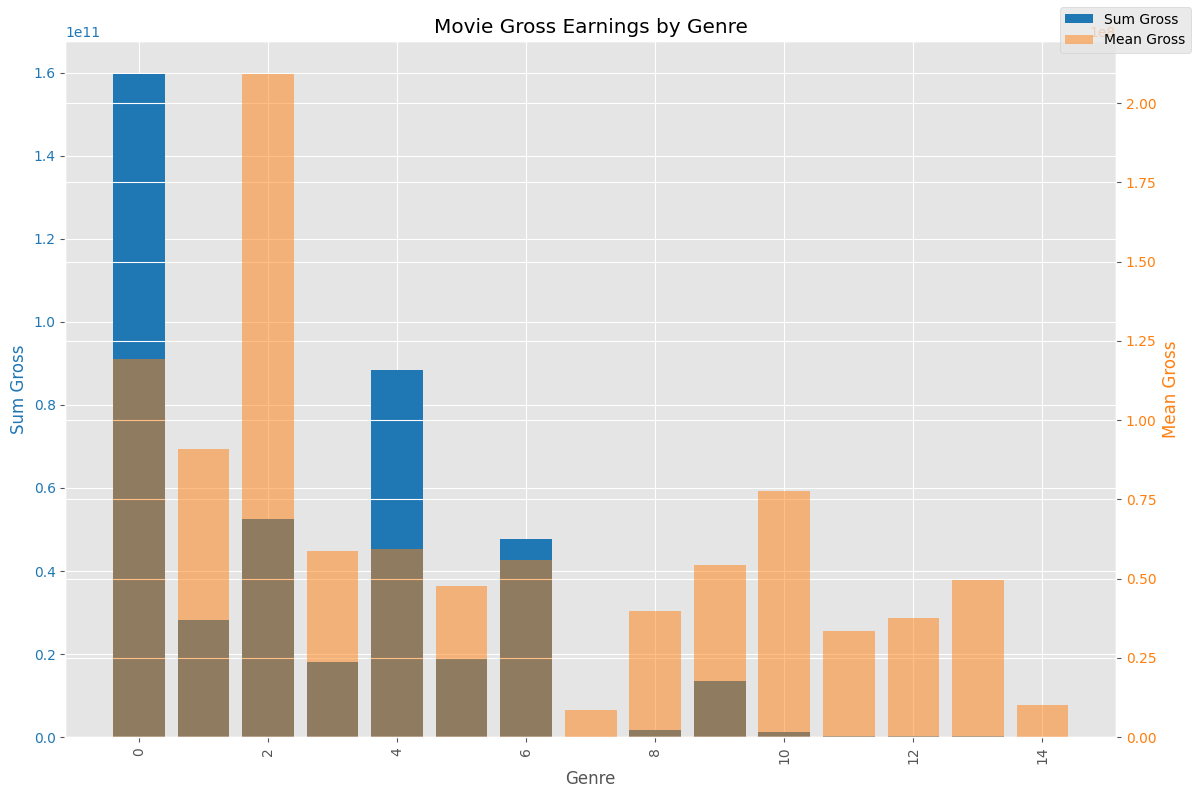

In [120]:
# Get the sum and mean of gross earnings for each genre
grouped_df = df.groupby(['genre'])['gross'].agg(['sum', 'mean'])
genres = grouped_df.index.tolist()
sum_gross = grouped_df['sum'].tolist()
mean_gross = grouped_df['mean'].tolist()

# Set up the bar chart
fig, ax1 = plt.subplots()

# Plot the bar chart for sum gross
color = 'tab:blue'
ax1.bar(genres, sum_gross, color=color, label='Sum Gross')

# Add labels and title
ax1.set_xlabel('Genre')
ax1.set_ylabel('Sum Gross', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Movie Gross Earnings by Genre')
plt.xticks(rotation=90)


# Create a second y-axis for mean gross and coefficient of variation
ax2 = ax1.twinx()

# Plot the bar chart for mean gross and coefficient of variation
color = 'tab:orange'
ax2.bar(genres, mean_gross, color=color, alpha=0.5, label='Mean Gross')
#ax2.plot(genres, cv_gross, color='tab:red', marker='o', label='Coefficient of Variation')

# Add labels and title
ax2.set_ylabel('Mean Gross', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend
fig.legend()

# Adjust layout
fig.tight_layout()

plt.show()

Conclusion: The Action genre had the highest level of success across all movies, whereas the Family genre had the highest average success rate.

**Conclusion:**

My analysis revealed that the most significant factors contributing to a movie's success were the production the movie's budget, and the votes. Additionally, certain genres, such as action and family, tended to be more successful than others.

Overall, my Python data analysis project provided valuable insights into the factors contributing to the success of a movie.